# Proyek Analisis Data: [Bike Share]
- **Nama:** [Abdillah Ilham]
- **Email:** [ilhamabdilerz@gmail.com]
- **ID Dicoding:** [abdillah_ilham_4ev2]

## Menentukan Pertanyaan Bisnis

Dalam menganalisis data harian Bike Share,
- Bagaimana temperatur yang diarasakan memengaruhi jumlah pengguna bike share baik yang berlangganan atau tidak?
- Bagaimana musim memengaruhi jumlah pengguna bike share?

Dalam menganalisis data perjam Bike Share,
- Bagaimana persebaran pengguna bike share dalam kurun waktu 24 jam, baik pada hari kerja maupun tidak?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, missingno as msno

## Data Wrangling

### Gathering Data

Pada proses ini dilakukan pembacaan terhadap data dimana pada data bike share terdapat 2 dataset, yakni day.csv dan hour.csv. Kedua dataset ini sendiri didasari pada sistem berbagi sepeda yang merupakan evolusi penyewaan sepeda tradisional yang memungkinkan proses secara otomatis, memungkinkan pengguna menyewa dan mengembalikan sepeda dengan mudah. Dengan lebih dari 500 program di seluruh dunia dan 500 ribu sepeda, sistem ini menarik perhatian besar karena peran krusialnya dalam mengatasi masalah lalu lintas, lingkungan, dan kesehatan. Data yang dihasilkan oleh sistem ini mencakup durasi perjalanan dan posisi secara eksplisit, menjadikannya jaringan sensor virtual yang dapat mendeteksi mobilitas kota dan memantau peristiwa penting di lingkungan tersebut.

In [3]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

kedua dataset diatas menjelaskan prilaku konsumen bike sharing yang diaggregatkan pada harian atau perjam.

### Assessing Data

#### General Information and Missing Value

Sesuai dengan metdata, berikut merupakan informasi dari setiap kolom baik hour maupun day:
- instant: indeks pencatatan
- dteday: tanggal
- season: musim (1: semi, 2: panas, 3: gugur, 4: dingin)
- yr: tahun (0: 2011, 1: 2012)
- mnth: bulan (1 hingga 12)
- hr: jam (0 hingga 23)
- holiday: hari libur atau bukan (diambil dari http://dchr.dc.gov/page/holiday-schedule)
- weekday: hari dalam seminggu
- workingday: jika hari bukan akhir pekan atau libur, bernilai 1; sebaliknya, bernilai 0.
- weathersit:
1. Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan
2. Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
3. Hujan Ringan, Hujan Ringan + Badai petir + Awan bertebaran, Hujan Ringan + Awan bertebaran
4. Hujan Lebat + Pecahan Es + Badai petir + Kabut, Salju + Kabut
- temp: suhu ternormalisasi dalam Celsius. Nilainya dibagi oleh 41 (maksimum)
- atemp: suhu terasa ternormalisasi dalam Celsius. Nilainya dibagi oleh 50 (maksimum)
- hum: kelembapan ternormalisasi. Nilainya dibagi oleh 100 (maksimum)
- windspeed: kecepatan angin ternormalisasi. Nilainya dibagi oleh 67 (maksimum)
- casual: jumlah pengguna non-registrasi
- registered: jumlah pengguna terdaftar
- cnt: jumlah total sepeda yang disewakan termasuk pengguna non-registrasi dan terdaftar

Perbedaan antara keduanya adalah pada day tidak terdapat kolom hr.

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sekilas pandang, tidak terdapat adanya missing value pada dataset tersebut.

<Axes: >

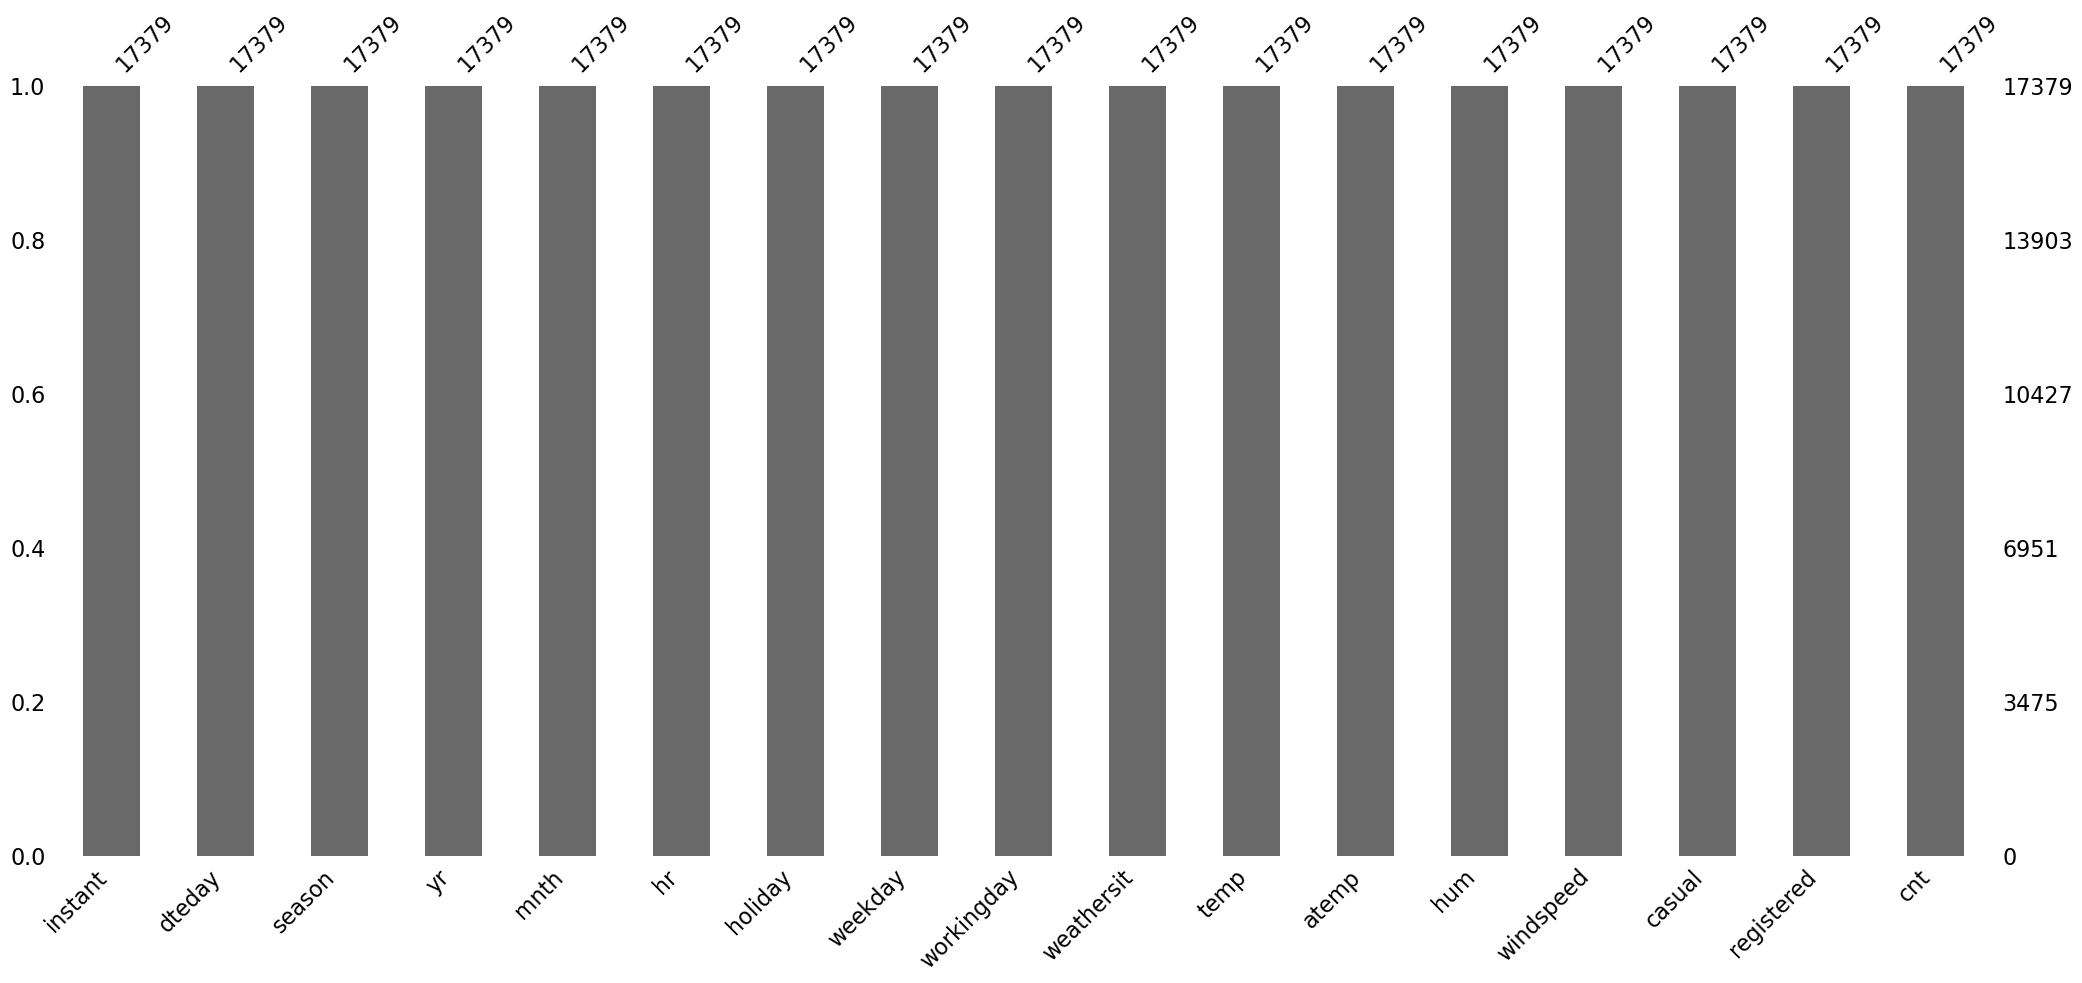

In [7]:
msno.bar(hour_df)

<Axes: >

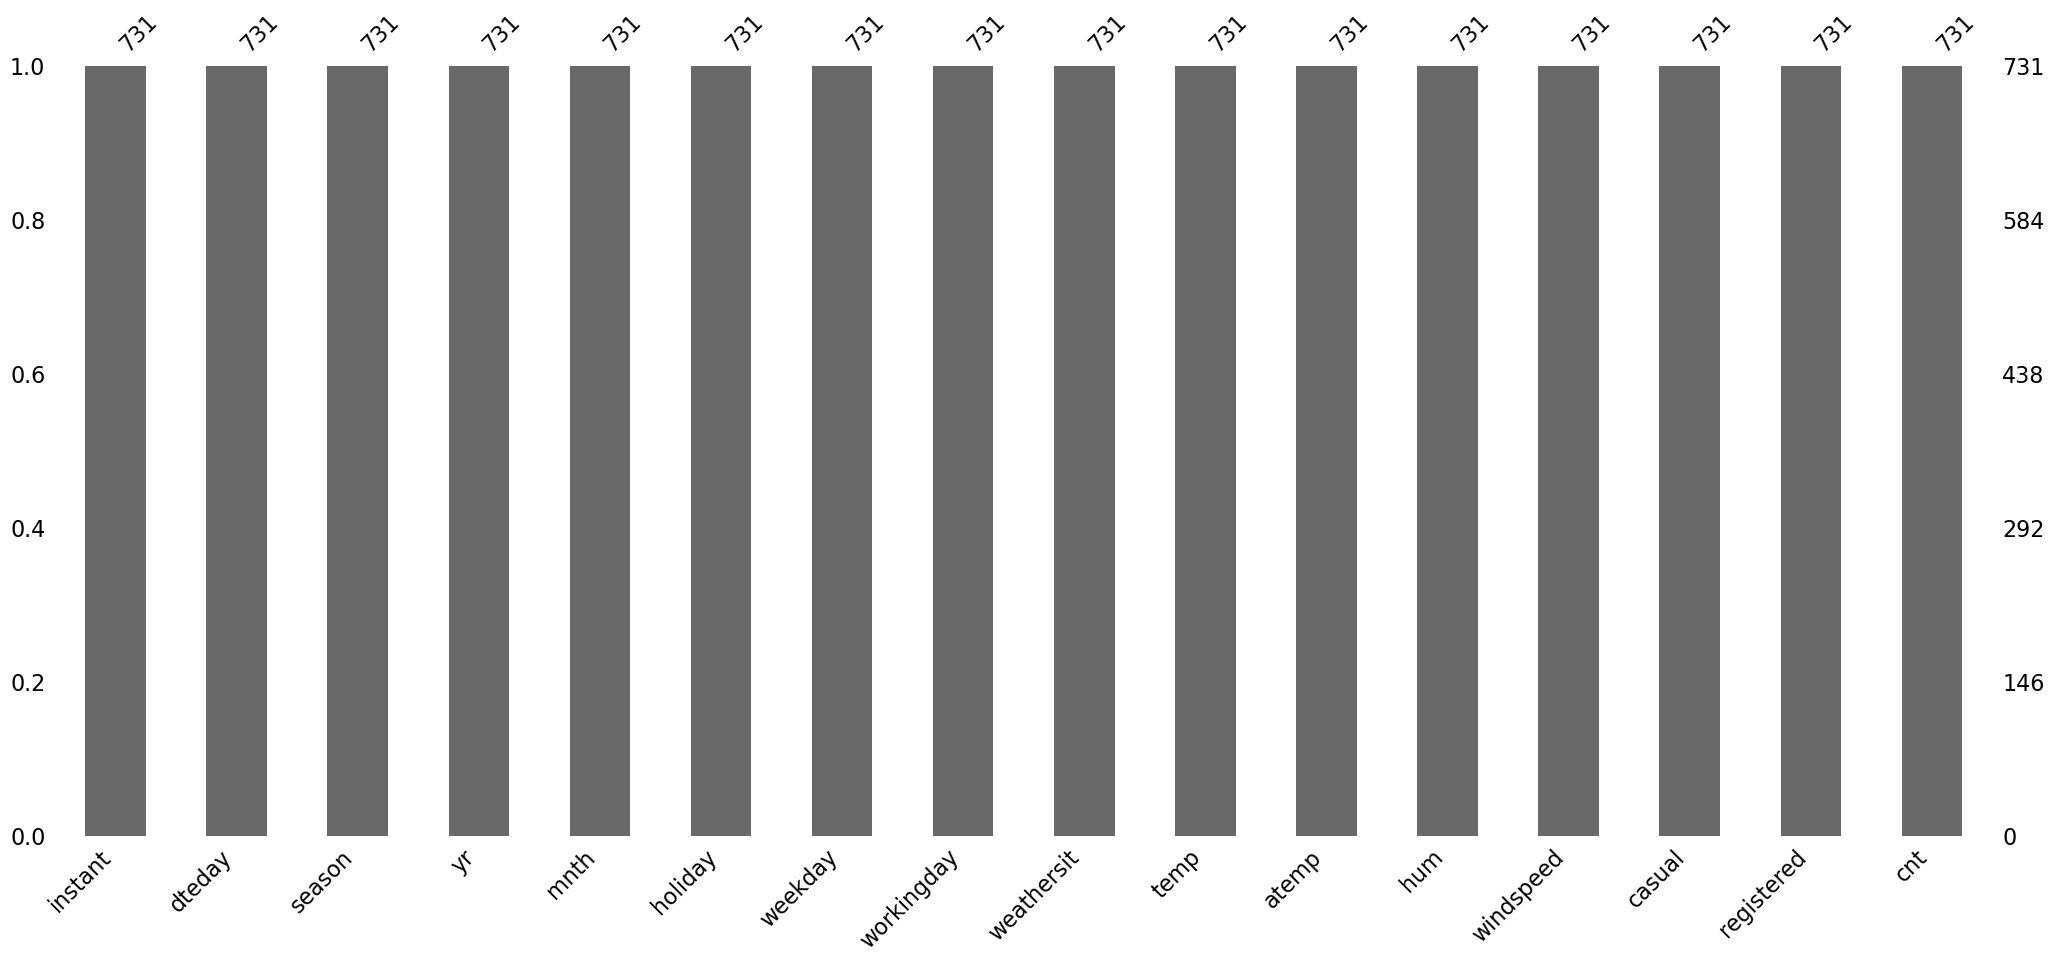

In [8]:
msno.bar(day_df)

Library Missingno dapat membuat visualisasi dari missing value. Didapatkan bahwa dari kedua dataset tersebut tidak terdapat missing value. Sedangkan untuk langkah selanjutnya adalah mengecek apakah terdapat data duplikat dari datasets tersebut. Berdasarkan metadata, instant (record index) merupakan unique value atau ID.

#### Duplicate Data

In [9]:
print("Jumlah duplikasi day.csv: ", day_df.duplicated().sum())
print("Jumlah duplikasi hour.csv: ", hour_df.duplicated().sum())

Jumlah duplikasi day.csv:  0
Jumlah duplikasi hour.csv:  0


Ternyata tidak ada data duplikat dalam data hour dan day

### Cleaning Data

Berdasarkan metadata dan informasi data di atas, terdapat beberapa ketidaksesuaian antara keduanya. Misalkan seperti temp, pada dataframe merupakan temperatur yang dinormalisasi, memang ini akan membantu apabila dataframe ini digunakan dalam pemodelan machine learning. Namun, jika digunakan dalam visualisasi akan menghasilkan kebingungan karena skala yang digunakan bukanlah skala temperatur yang ada. Maka beberapa kolom yang skalanya tidak sesuai akan dikembalikan ke nilai aslinya. Dalam hal ini berarti kolom: temp, atemp, hum, dan windspeed.

In [10]:
change_scale = {"temp":41, "atemp":50, "hum":100, "windspeed":67}

for key, values in change_scale.items():
    day_df[key] = round(day_df[key]*values, 2)
    hour_df[key] = round(hour_df[key]*values, 2)

In [11]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [12]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.40,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.64,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.64,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.40,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.40,75.0,0.0,0,1,1


In [13]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Selain mengembalikan nilai asli dan membetulkan tipe data kolom, dilakukan pula pengembalian nilai asli pada data kategorik: mnth, season, holiday, weekday, workingday, dan weathersit.

In [14]:
hour_df['mnth'] = hour_df['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df["holiday"] = hour_df["holiday"].replace({1: 'Yes', 0: 'No'})
hour_df['weekday'] = hour_df['weekday'].replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
hour_df["workingday"] = hour_df["workingday"].replace({1: 'Yes', 0: 'No'})
hour_df['weathersit'] = hour_df['weathersit'].replace({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'})

day_df['mnth'] = day_df['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df["holiday"] = day_df["holiday"].replace({1: 'Yes', 0: 'No'})
day_df['weekday'] = day_df['weekday'].replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
day_df["workingday"] = day_df["workingday"].replace({1: 'Yes', 0: 'No'})
day_df['weathersit'] = day_df['weathersit'].replace({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'})

In [15]:
categorical_column = ["mnth", "season", "holiday", "weekday", "workingday", "weathersit"]

In [16]:
for column in categorical_column:
    day_df.astype("category")
    hour_df.astype("category")

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Kita sudah diujung dari data cleaning, namun untuk mengurangi redundansi dan, maka holiday akan dihapus karena dirasa sudah direpresentasikan oleh workingday.

#### Outlier Cheking

In [18]:
day_df.select_dtypes(include="object").columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], dtype='object')

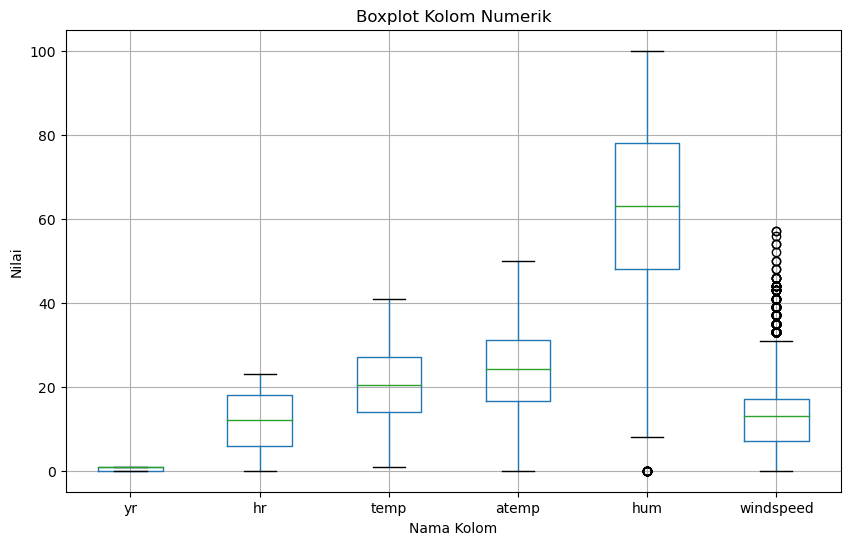

In [19]:
numerical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']


plt.figure(figsize=(10, 6))
hour_df[numerical_columns].boxplot(sym='o')
plt.title('Boxplot Kolom Numerik')
plt.ylabel('Nilai')
plt.xlabel('Nama Kolom')
plt.show()

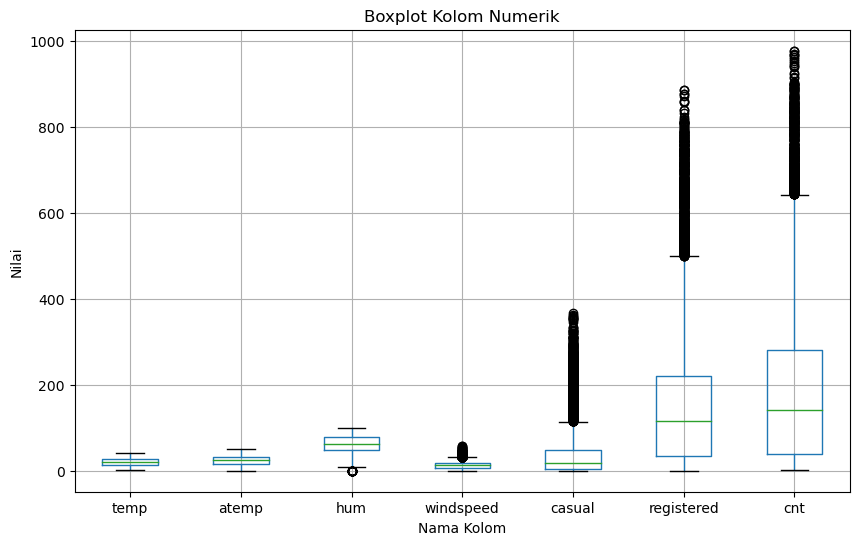

In [20]:
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


plt.figure(figsize=(10, 6))
hour_df[numerical_columns].boxplot(sym='o')
plt.title('Boxplot Kolom Numerik')
plt.ylabel('Nilai')
plt.xlabel('Nama Kolom')
plt.show()

Dalam step ini, terdapat beberapa outlier yang terlihat, yakni melebihi atau kurang dari mdian+-1,5IQR. Namun jika ditelaah kembali, kejadian-kejadian ini bukanlah sebuah kesalahan pencatatam atau dalam visualisasi ini justru outlier-outlier ini akan menjelaskan variasi-variasi yang ada. Maka dengan ini, proses cleaning selesai dan dilanjutkan ke EDA.

In [21]:
day_df.to_csv('day_df.csv')
hour_df.to_csv('hour_df.csv')

In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Persebaran Data

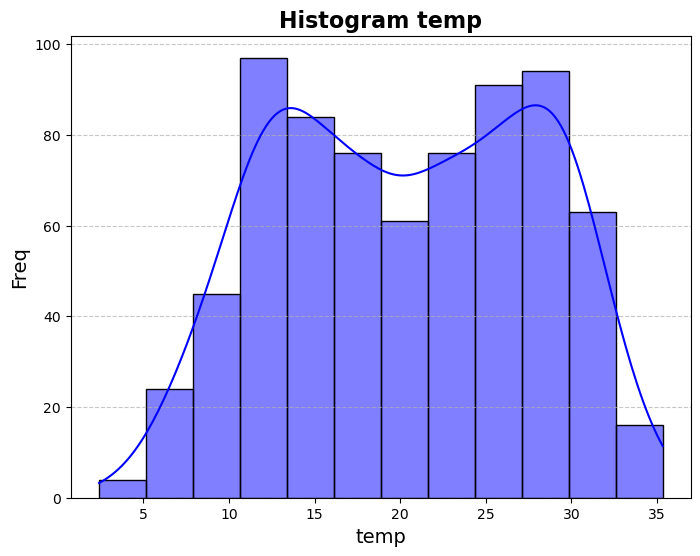

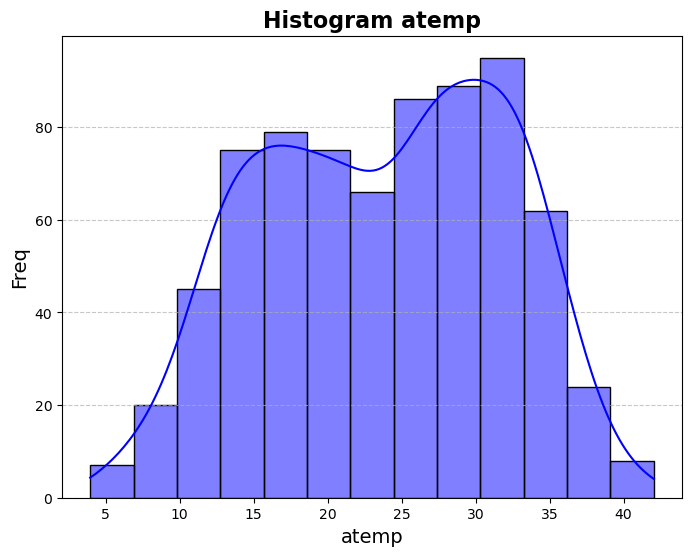

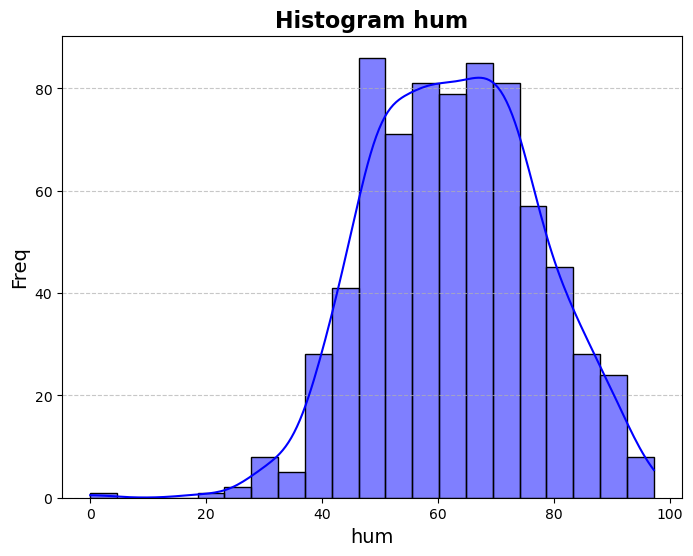

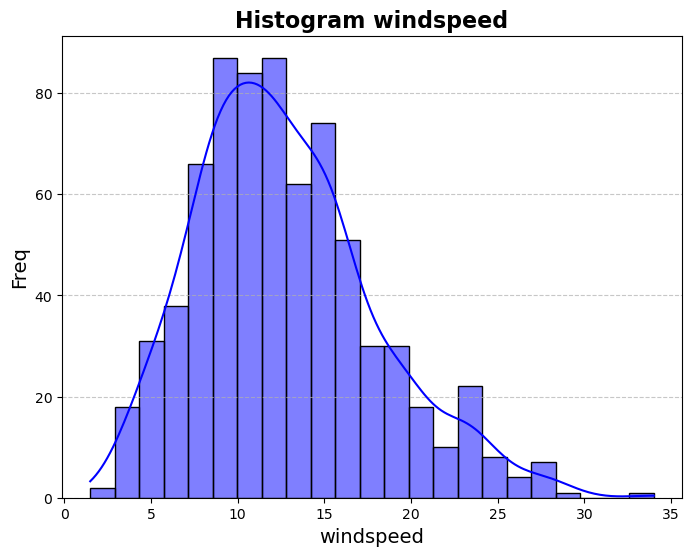

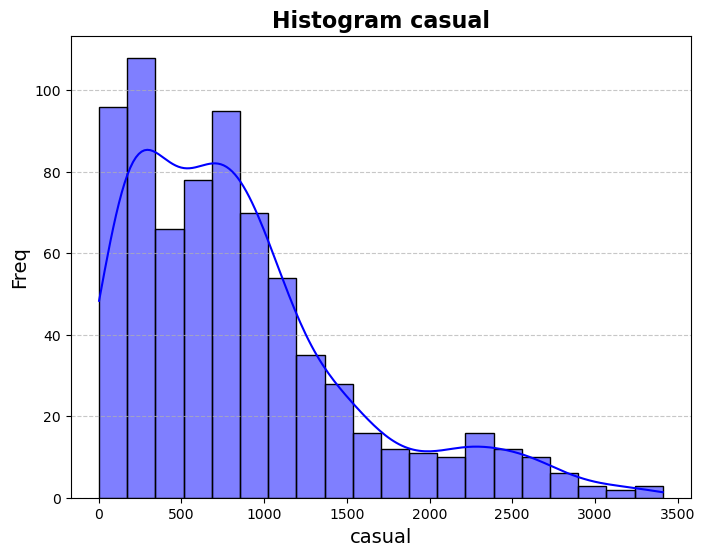

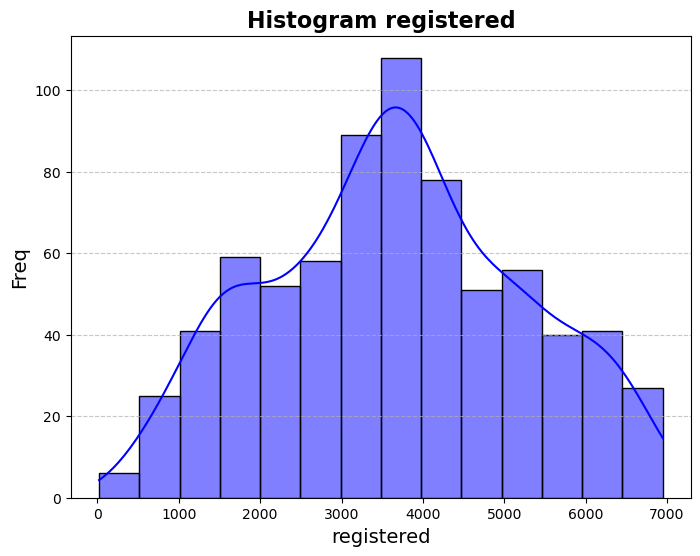

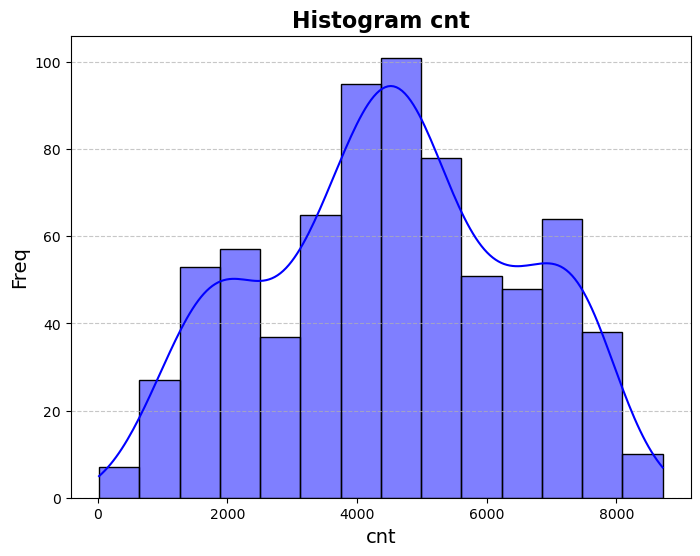

In [22]:
numerical_columns = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(day_df[column], kde=True, color='blue', edgecolor='black')
    plt.title(f'Histogram {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Freq', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

Dari beberapa histogram di atas, tidak terdapat distribusi yang aneh. Semua data numerik antara berdistribusi normal seperti registered, cnt, hum, dan temp serta atemp, mekipun untuk temp dan atemp terdapat kecenderungan bimodal. Sedangkan untuk casual dan windspeed terdapat skew ke kanan. Oleh karena dari distribusi data tidak terdapat persebaran yang ekstrem, maka pada EDA kali ini hanya akan dilakukan melalui <b>visualisasi</b> saja.

In [23]:
day_df.describe()

,instant,dteday,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,20.310821,23.717784,62.789357,12.762654,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,2.420000,3.950000,0.000000,1.500000,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,13.820000,16.895000,52.000000,9.040000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,20.430000,24.340000,62.670000,12.130000,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,26.875000,30.430000,73.020000,15.625000,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,35.330000,42.040000,97.250000,34.000000,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,7.505177,8.148006,14.242923,5.192157,686.622488,1560.256377,1937.211452


Hasil dari describe adalah sebagai berikut. Yang ingin digaris bawahi adalah suhu di Kota Washington (District of Columbia) berada di kisaran 23 derajat Celcius dengan kelembaban 62%, hembusan angin di angka 12 KM/jam. Angka ini tidak terlalu turun atau naik secara ekstrem pada perubahan musim. Sedangkan untuk jumlah pengguna Bike Share casual sekitar 800 pengguna, resgitered 3500 pengguna dan angka ini dapat naik atau turun drastis disebabkan oleh beberapa hal.

Text(0.5, 1.0, 'Casual vs Registered Bike Share Users')

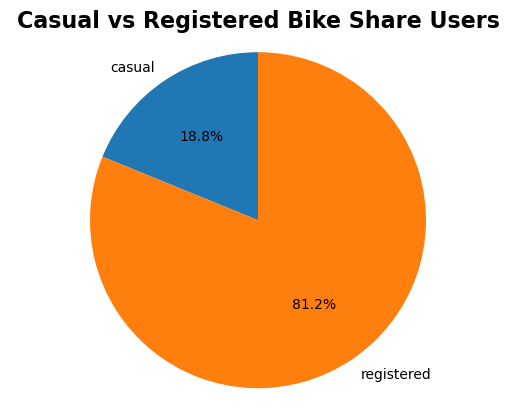

In [24]:
label = ["casual", "registered"]
values = [day_df["casual"].sum(), day_df["registered"].sum()]

fig, ax = plt.subplots()
ax.pie(values, labels=label, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  

plt.title('Casual vs Registered Bike Share Users', fontsize=16, fontweight='bold')

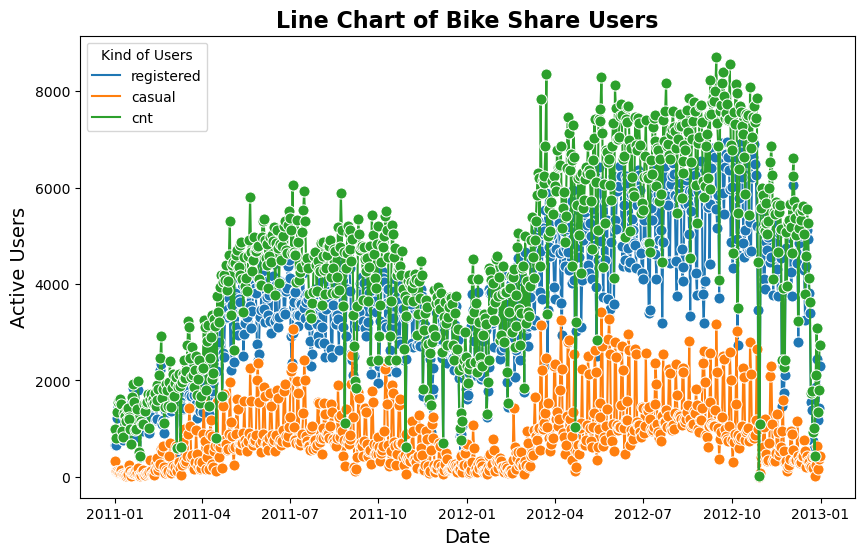

In [25]:
melted_df = pd.melt(day_df[["dteday", "registered", "casual", "cnt"]], id_vars="dteday", var_name="numeric_column", value_name='Value')

plt.figure(figsize=(10, 6))
sns.lineplot(x='dteday', y='Value', hue='numeric_column', data=melted_df, marker='o', markersize=8)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Active Users', fontsize=14)
plt.title('Line Chart of Bike Share Users', fontsize=16, fontweight='bold')
plt.legend(title='Kind of Users')

plt.show()

Dari chart di atas, walaupun sedikit berantakan, dapat diketahui bahwa jumlah pengguna total naik seiring dengan naiknya pelanggan tetap, sedangkan pelanggan casual tetap. Pola ini juga mengikuti bar chart season, dimana pengguna sepeda menghindari musim dingin.

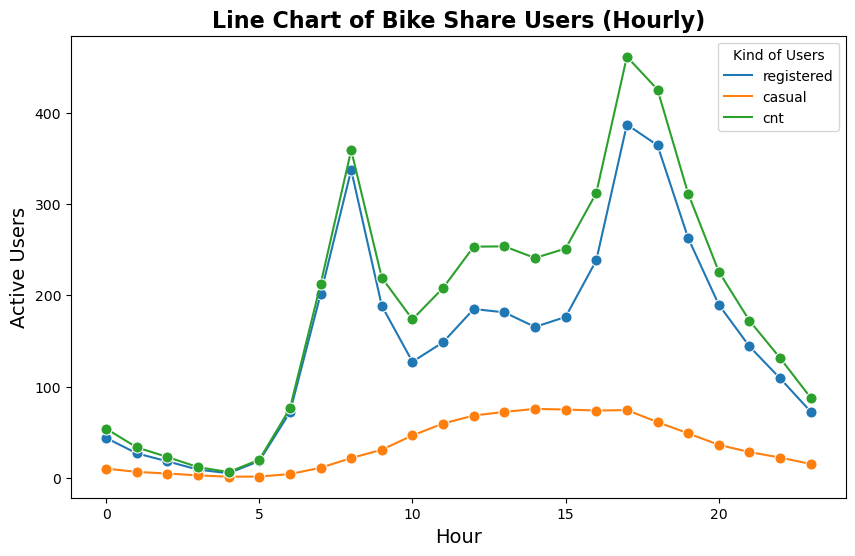

In [26]:
daily_mean = hour_df[["hr", "registered", "casual", "cnt"]].groupby(['hr']).mean().reset_index()
melted_df = pd.melt(daily_mean, id_vars="hr", var_name="numeric_column", value_name='Value')

plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='Value', hue='numeric_column', data=melted_df, marker='o', markersize=8)

plt.xlabel('Hour', fontsize=14)
plt.ylabel('Active Users', fontsize=14)
plt.title('Line Chart of Bike Share Users (Hourly)', fontsize=16, fontweight='bold')
plt.legend(title='Kind of Users')

plt.show()

Sedangkan untuk jumlah pengguna setiap jam memuncak pada rush hour (pukul 05-09 dan 15-18) yang didominasi oleh pelanggan registrasi. Sedangkan untuk pengguna casual memuncak pada siang hari.

### Multivariate Analysis

In [27]:
all_column_names = day_df.columns.tolist()

In [28]:
all_column = [
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']
categorical_columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

C:\Users\Asem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Asem\AppData\Local\Temp\ipykernel_17884\185188436.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

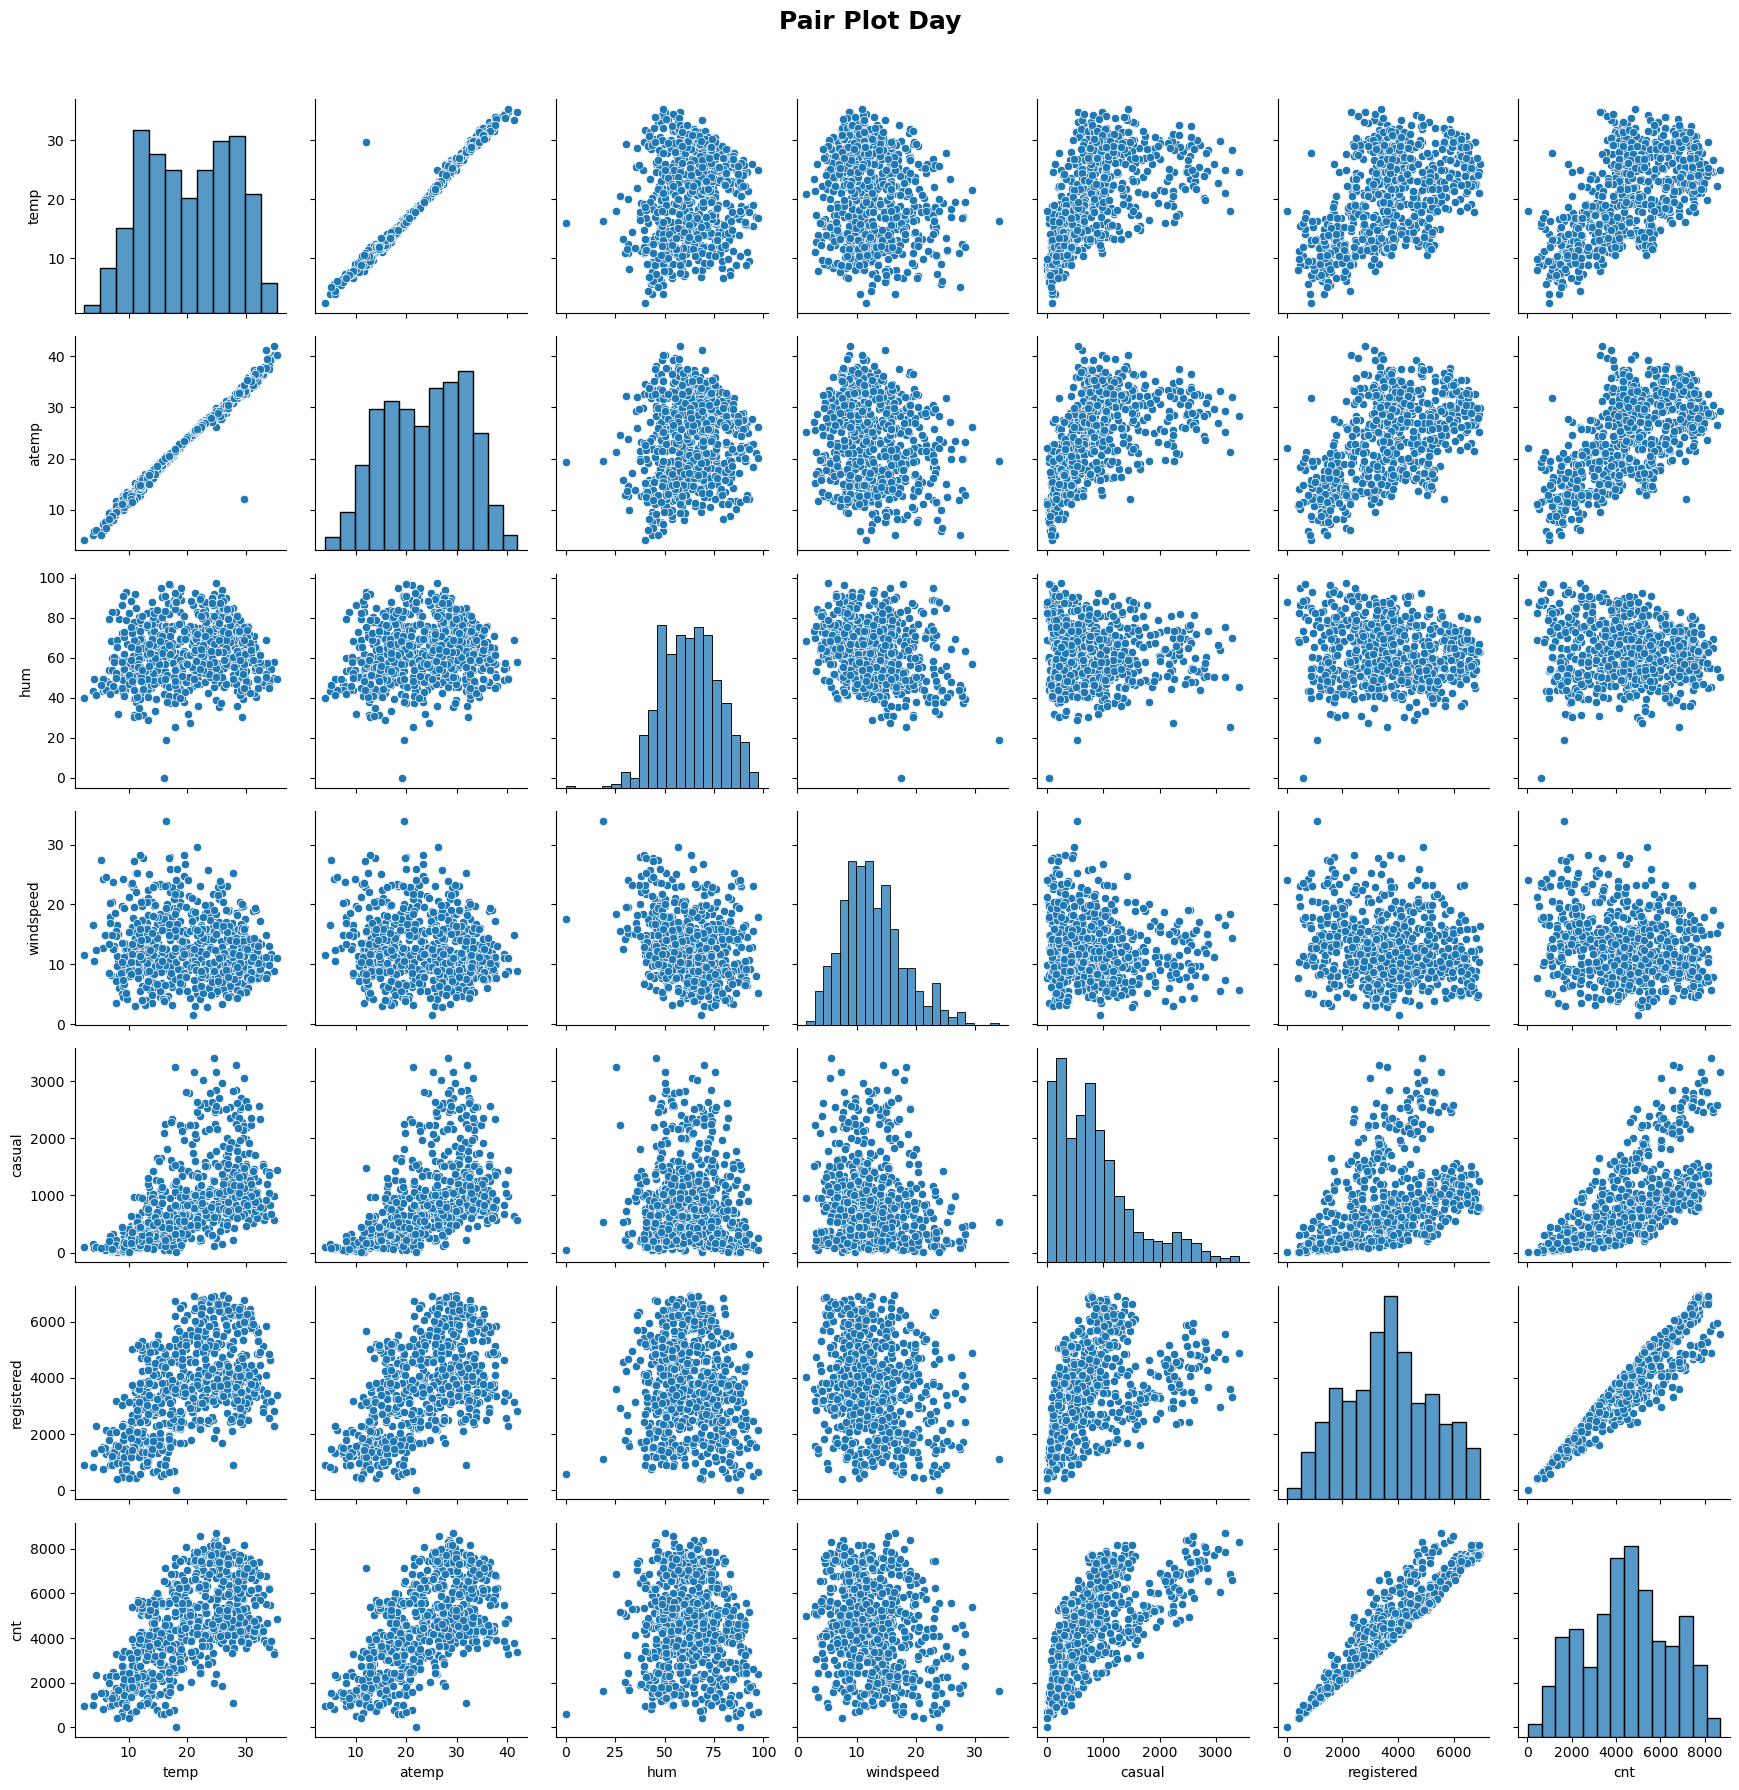

In [29]:
plt.figure(figsize=(10, 8))

pair_plot = sns.pairplot(day_df[numerical_columns], diag_kind='hist', markers=["o", "s"])
pair_plot.fig.suptitle('Pair Plot Day', y=1.02, fontsize=18, fontweight='bold')
plt.tight_layout()

plt.show()

Jika dilihat pada pairplots di atas jika perusahaan berfokus pada profit, maka cnt merupakan variabel target mereka. Tentunya cnt akan dipengaruhi oleh registered dan casual, namun paling tidak kita bisa tahu bahwa tidak terlalu ada perbedaan antara casual dan registered. Namun, dari variabel numeric lainnya, temperatur dan atemp memiliki hubungan positif walupun dengan persebaran yang cukup lebar. Dapat dilihat pada heatmap dibawah bahwa korelasinya masih baik.

<Axes: >

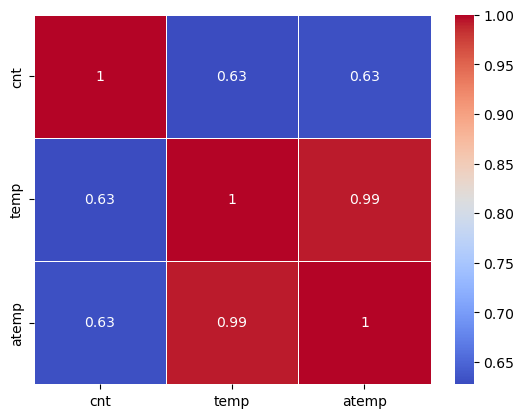

In [30]:
sns.heatmap(day_df[["cnt", "temp", "atemp"]].corr(), annot=True, cmap='coolwarm', linewidths=0.5)

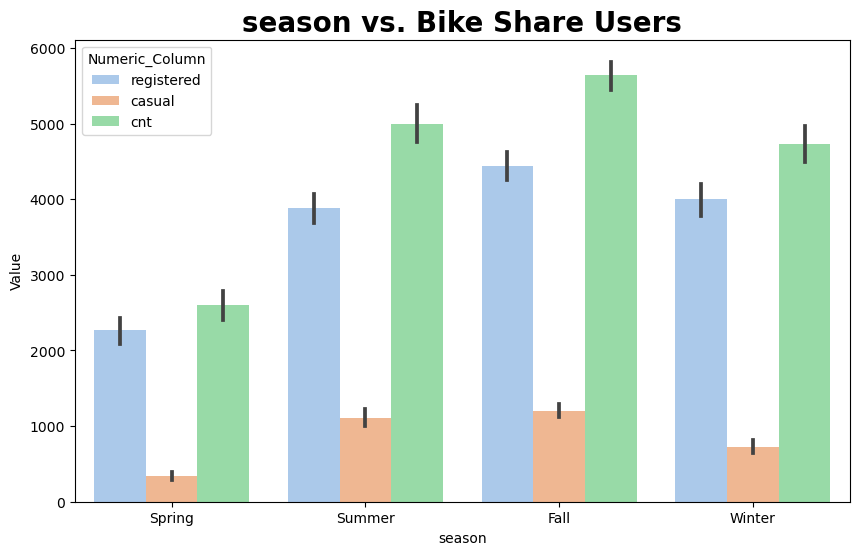

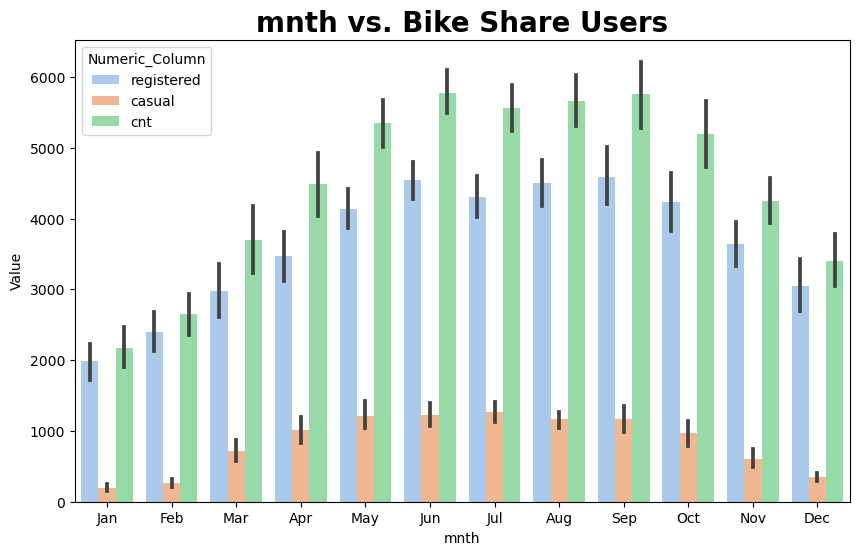

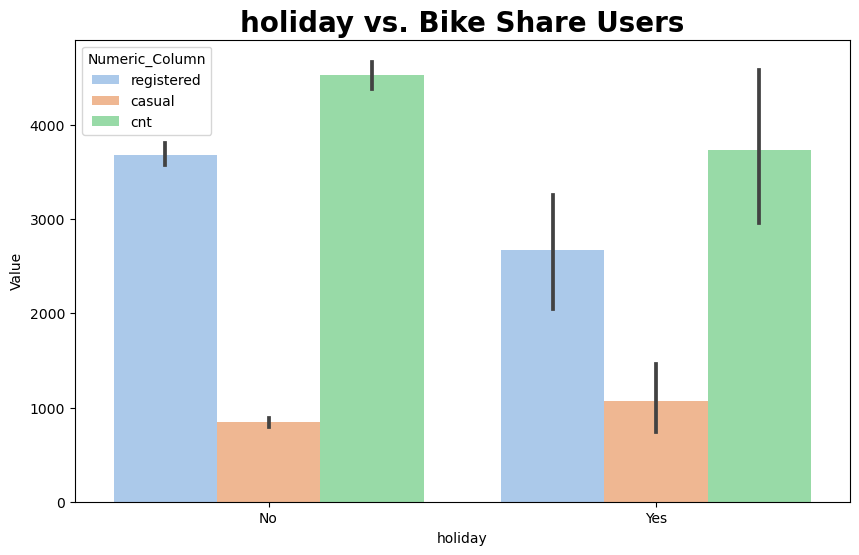

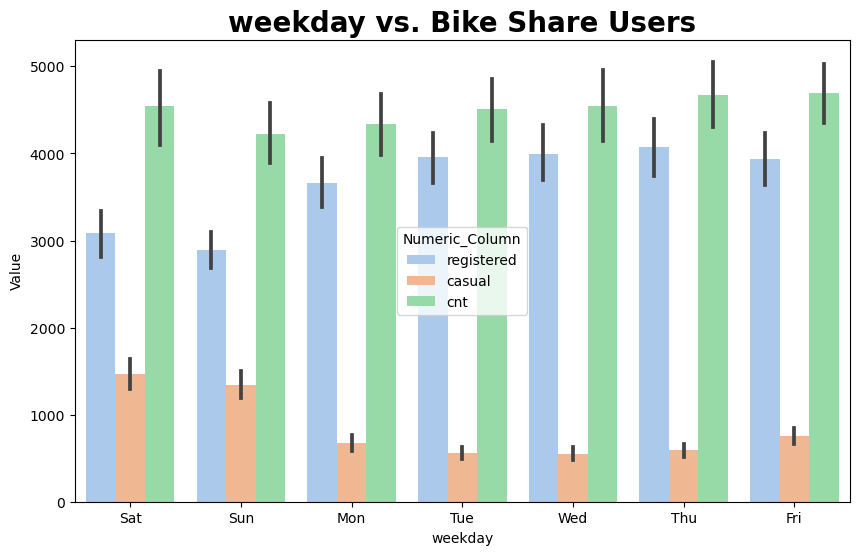

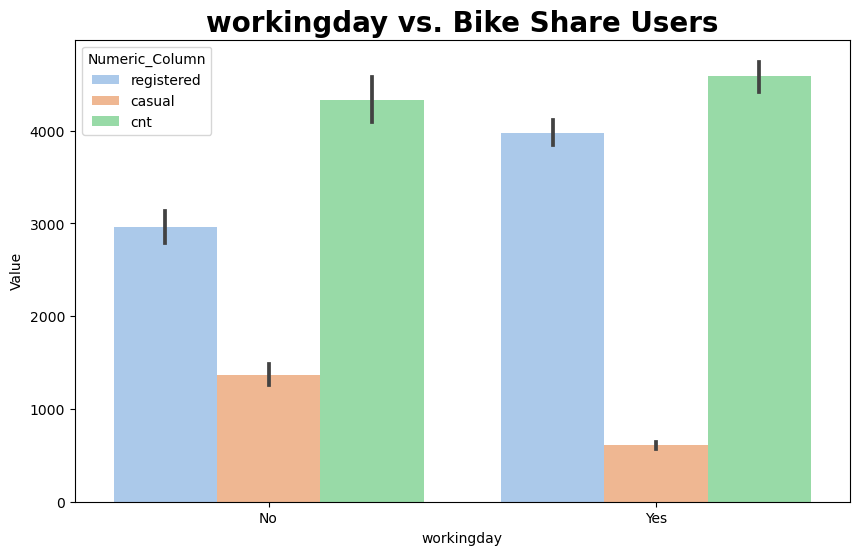

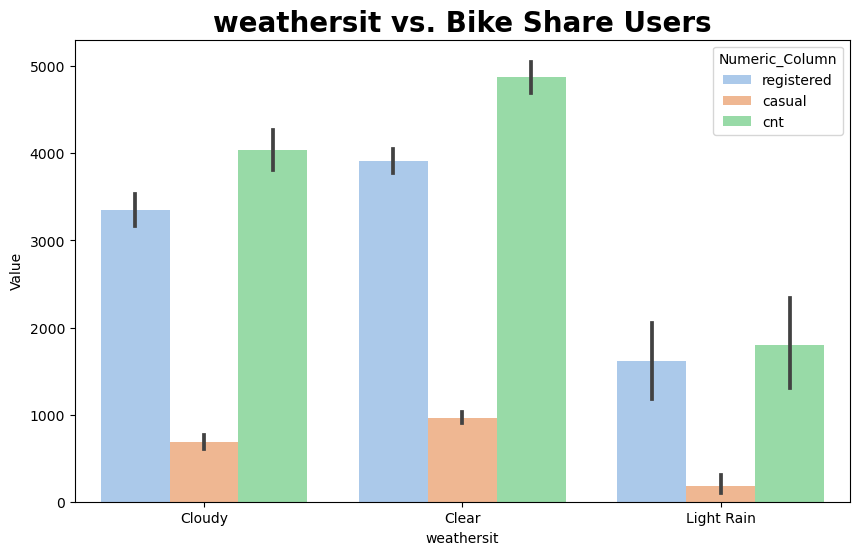

In [31]:
for column in categorical_columns:
    melted_df = pd.melt(day_df, id_vars=column, value_vars=["registered", "casual", "cnt"],
                    var_name='Numeric_Column', value_name='Value')

    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y='Value', hue='Numeric_Column', data=melted_df, palette='pastel')
    plt.title(f'{column} vs. Bike Share Users', fontsize=20, fontweight='bold')
    
    plt.show()

Dari beberapa plot di atas, pada season, pengguna bike akan cenderung menggunakan sepeda pada musim panas dan musim gugur, dan beberapa pada musim dingin, namun tidak pada musim semi. Bersesuaian dengan hal tersebut, pengguna sepeda tampak memuncak di dekat bulan Juni hingga Agustus, yang mulai menurun hingga desember dan paling rendah pada bulan Januari (puncak musim dingin). Yang mengejutkan tidak terlalu ada perbedaan antara registered dan casual pada hari libur atau tidak. Sedangkan pengguna casual pada hari weekend terlihat meningkat sehingga jumlah pengguna total pada weekend atau weekday hampir sama.

## Visualization & Explanatory Analysis

#### Pertanyaan 1: Bagaimana temperatur yang dirasakan memengaruhi jumlah pengguna bike share baik yang berlangganan atau tidak?

Pertanyaan ini sebagian terjawab pada bagian EDA, jika kita lihat kembali pada bagian pairsplot dimana terdapat korelasi positif antara jumlah pengguna Bike Share dan temperatur yang dirasakan. Dimana hal ini menunjukkan bahwa orang-orang cenderung memesan Bike Share apabila temperatur yang dirasakan tidak terlalu dingin.

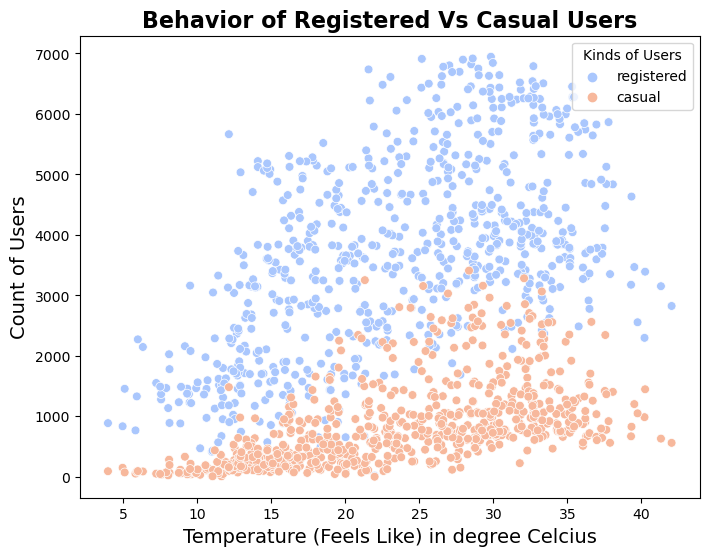

In [32]:
melted_df = pd.melt(day_df[["atemp", "registered", "casual"]], id_vars='atemp', var_name='Users', value_name='Value')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='atemp', y="Value", hue="Users", data=melted_df, palette='coolwarm', s=40)

plt.xlabel('Temperature (Feels Like) in degree Celcius', fontsize=14)
plt.ylabel('Count of Users', fontsize=14)
plt.title('Behavior of Registered Vs Casual Users', fontsize=16, fontweight='bold')
plt.legend(title='Kinds of Users', loc='upper right')

plt.show()

Keduanya tipe pengguna memang bertambah seiring berjalannya temperature. Namun user registered adalah jenis user yang sangat terpengaruhi oleh temperatur.

#### Pertanyaan 2: Bagaimana musim memengaruhi jumlah pengguna bike share?

Pertanyaan ini juga sudah terjawab pada EDA. dimana baik pengguna casual ataupun registered menghindari musim semi dalam menggunakan layanan.

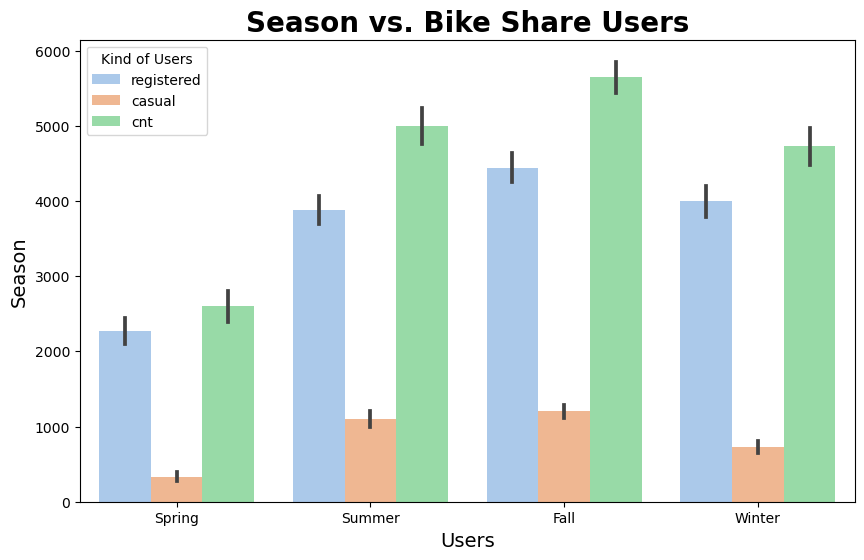

In [33]:
melted_df = pd.melt(day_df, id_vars="season", value_vars=["registered", "casual", "cnt"],
                    var_name='Numeric_Column', value_name='Value')
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y='Value', hue='Numeric_Column', data=melted_df, palette='pastel')
plt.title("Season vs. Bike Share Users", fontsize=20, fontweight='bold')
plt.xlabel('Users', fontsize=14)
plt.ylabel('Season', fontsize=14)
plt.legend(title='Kind of Users')

plt.show()

Dimana puncak pengguna ada pada musim panas dan gugur, kemudian menurun pada musim dingin. Adapun perbedaan jenis pengguna yang terjadi tidak terlalu berpengaruh.

#### Bagaimana persebaran pengguna bike share dalam kurun waktu 24 jam, baik pada hari kerja maupun tidak?

Secara rata-rata, pengguna Bike Share akan mencapai puncak pada rush hour (pukul 06-09 dan 15-18) untuk registered dan untuk pengguna casual pada pukul 10-18. Namun ini memperhitungkan persebaran waktu pada semua kondisi (hari kerja, akhir pekan, dan hari libur)


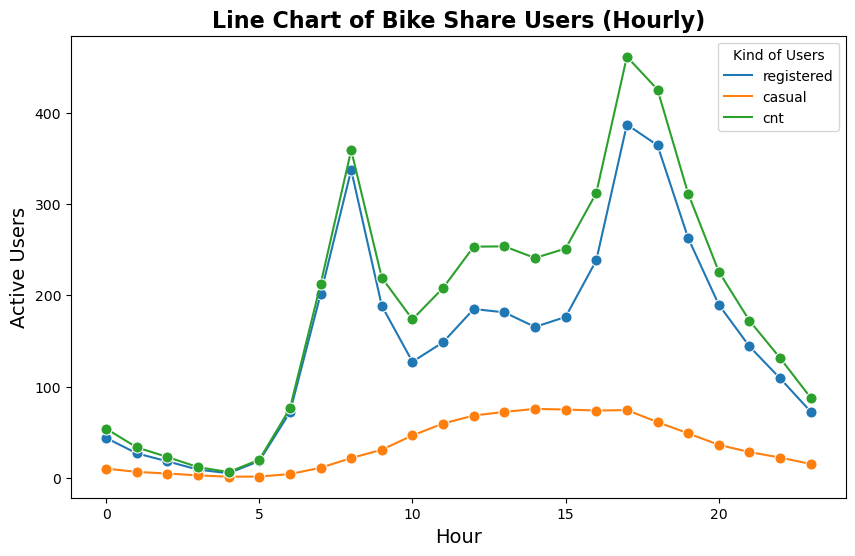

In [34]:
daily_mean = hour_df[["hr", "registered", "casual", "cnt"]].groupby(['hr']).mean().reset_index()
melted_df = pd.melt(daily_mean, id_vars="hr", var_name="numeric_column", value_name='Value')

plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='Value', hue='numeric_column', data=melted_df, marker='o', markersize=8)

plt.xlabel('Hour', fontsize=14)
plt.ylabel('Active Users', fontsize=14)
plt.title('Line Chart of Bike Share Users (Hourly)', fontsize=16, fontweight='bold')
plt.legend(title='Kind of Users')

plt.show()

In [35]:
test_dict = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
i, j = 1, 3
tups = list(test_dict.items())
 
# swapping by indices
tups[i], tups[j] = tups[j], tups[i]

In [36]:
dict(tups)

{0: 'Sun', 3: 'Wed', 2: 'Tue', 1: 'Mon', 4: 'Thu', 5: 'Fri', 6: 'Sat'}

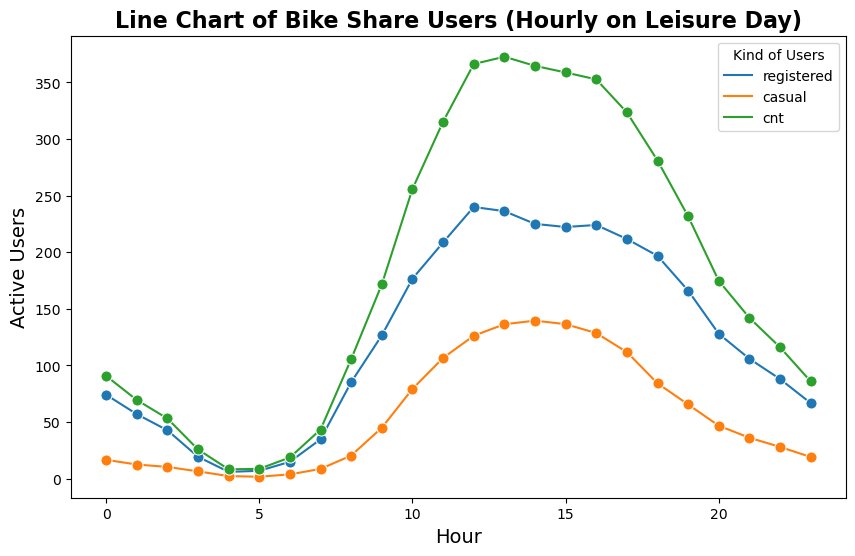

In [37]:
hour_df['weekday'] = hour_df['weekday'].replace({'Sun':7, 'Mon':1, 'Tue':2, 'Wed':3, 'Thu':4, 'Fri':5, 'Sat':6})
hour_df["weekday"] = hour_df["weekday"].astype("int")
daily_mean = hour_df[(hour_df.weekday >=6) | (hour_df.holiday=="Yes")]
daily_mean = daily_mean[["hr", "registered", "casual", "cnt"]].groupby(['hr']).mean().reset_index()
melted_df = pd.melt(daily_mean, id_vars="hr", var_name="numeric_column", value_name='Value')

plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='Value', hue='numeric_column', data=melted_df, marker='o', markersize=8)

plt.xlabel('Hour', fontsize=14)
plt.ylabel('Active Users', fontsize=14)
plt.title('Line Chart of Bike Share Users (Hourly on Leisure Day)', fontsize=16, fontweight='bold')
plt.legend(title='Kind of Users')

plt.show()

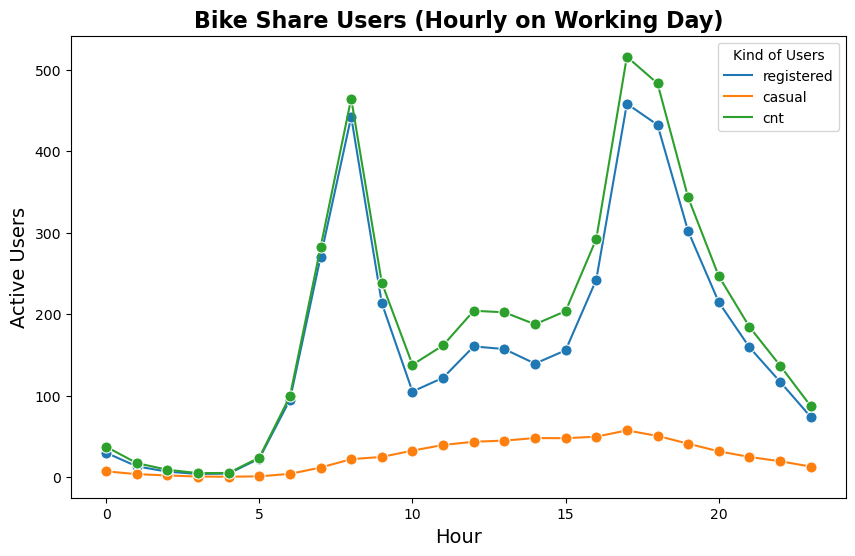

In [38]:
hour_df["weekday"] = hour_df["weekday"].astype("int")
daily_mean = hour_df[(hour_df.weekday <6) | (hour_df.workingday=="Yes")]
daily_mean = daily_mean[["hr", "registered", "casual", "cnt"]].groupby(['hr']).mean().reset_index()
melted_df = pd.melt(daily_mean, id_vars="hr", var_name="numeric_column", value_name='Value')

plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='Value', hue='numeric_column', data=melted_df, marker='o', markersize=8)

plt.xlabel('Hour', fontsize=14)
plt.ylabel('Active Users', fontsize=14)
plt.title('Bike Share Users (Hourly on Working Day)', fontsize=16, fontweight='bold')
plt.legend(title='Kind of Users')

plt.show()

Ternyata line chart secara keseluruhan hampir sama dengan ketika hari kerja saja. Sedangkan pada hari libur justru peak timenya terjadi pada siang hingga sore hari (pukul 10-20)

### RFM Analysis

Hal ini sudah disampaikan dalam EDA, bahwa terdapat beberapa hal yang dapat memberikan efisiensi dalam menjalankan Bike Share, dimana akan lebih baik apabila manajemen menyimpan sepeda pada saat start peak hour dan pada musim non-dingin, seperti musim panas dan gugur. Selain itu, temperatur juga dapat menjadi salah satu acuan dalam memperkirakan jumlah pengguna registered.

## Conclusion

- Secara umum, pengguna sepeda meningkat seiring bertambahnya temperatur. Namun, terdapat perbedaan sifat antara pelanggan registered dan casual, dimana korelasi positif itu lebih terlihat pada pengguna registered.
- Secara umum, puncak pengguna ada pada musim panas dan gugur, kemudian menurun pada musim dingin. Adapun perbedaan jenis pengguna yang terjadi tidak terlalu berpengaruh.
- Secara umum, pengguna Bike Share akan mencapai puncak pada rush hour mayoritas berasal dari pelanggan registered. Namun jika ditelaah berdasarkan jenis hari (libur atau tidak) terdapat perbedaan. Untuk rush hour kurang lebih karakteristiknya sama, namun ketika liburan, peak time terjadi pada siang hingga sore hari (pukul 10-20)